https://www.kaggle.com/datasets/l3llff/wind-power

## 1. Introducción.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection, LineCollection
import numpy as np
import tqdm
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

datos = pd.read_csv('data.csv')
datos.columns = ['Date', 'Power']
display(datos.head())

,Date,Power
0,2011-01-01 00:00:00,3416.0
1,2011-01-01 00:15:00,4755.0
2,2011-01-01 00:30:00,4939.0
3,2011-01-01 00:45:00,4939.0
4,2011-01-01 01:00:00,4998.0


In [16]:
datos['Date'] = pd.to_datetime(datos['Date'], format='%Y-%m-%d %H:%M:%S')
datos.index = datos['Date']
del datos['Date']
datos = datos.resample('ME').agg({'Power': 'sum'})
display(datos.head())

,Power
Date,
2011-01-31,4753535.0
2011-02-28,4502270.0
2011-03-31,4948915.0
2011-04-30,4795377.0
2011-05-31,5590865.0


## 2. Representación gráfica de la serie temporal.

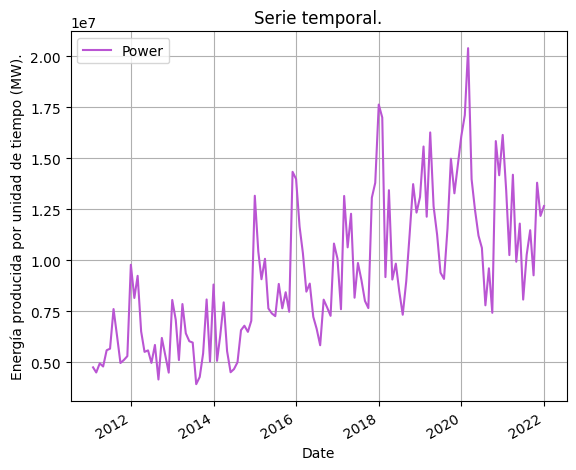

In [17]:
sns.lineplot(x=datos.index, y = datos['Power'], color = 'mediumorchid', label = 'Power')
plt.xticks(rotation=30, ha='right')
plt.title('Serie temporal.')
plt.grid()
plt.ylabel('Energía producida por unidad de tiempo (MW).')
plt.legend()
plt.show()

## 3. Descomposición de la serie temporal.

In [18]:
def mes(timestamp):
    meses = {"Enero": 1,
         "Febrero": 2,
         "Marzo": 3,
         "Abril": 4,
         "Mayo": 5,
         "Junio": 6,
         "Julio": 7,
         "Agosto": 8,
         "Septiembre": 9,
         "Octubre": 10,
         "Noviembre": 11,
         "Diciembre": 12}
    cadenas = str(timestamp).split('-')
    mes = int(cadenas[1])
    months = list(meses.keys())
    for month in months:
        if mes == meses[month]:
            return month, cadenas[0]

El mes con menor coeficiente es: Junio de 2011 con 0.794664543726926
El mes con mayor coeficiente es: Diciembre de 2011 con 1.3738974938743784


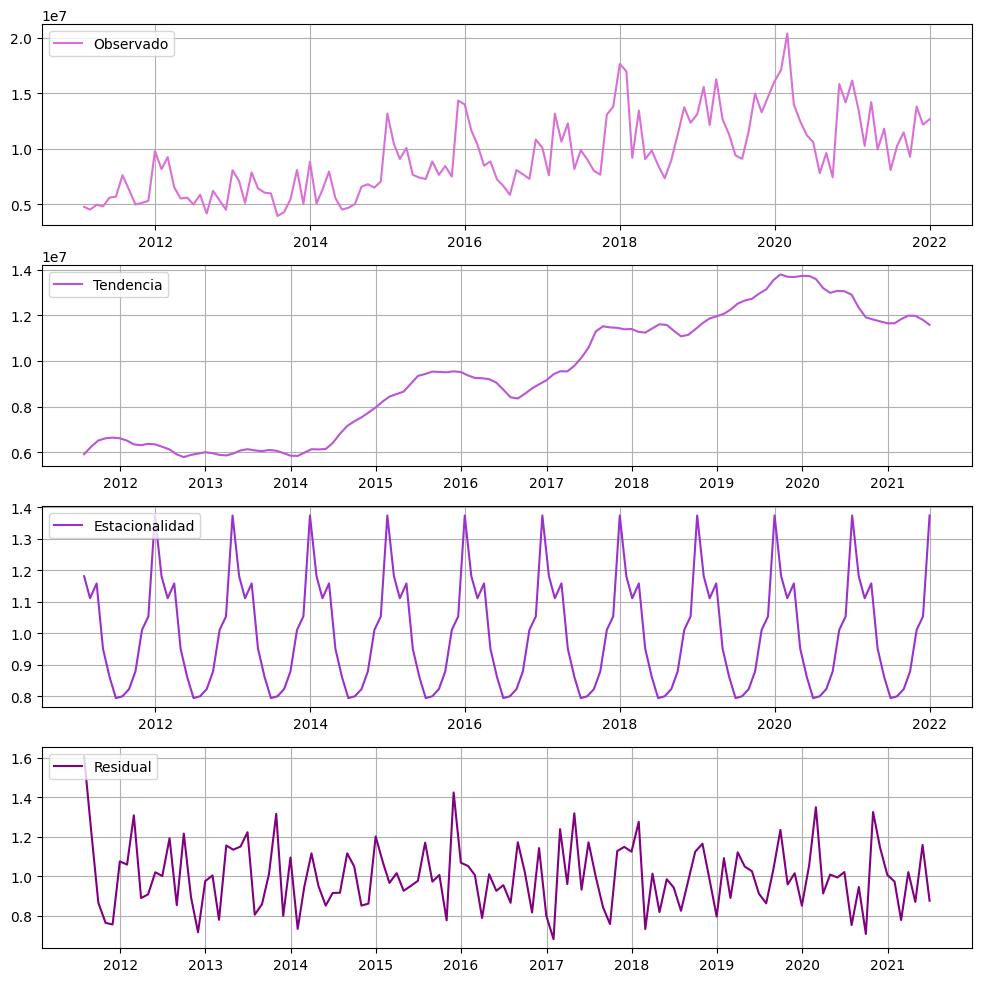

In [19]:
resultado = seasonal_decompose(datos['Power'], model = 'multiplicative')
print(f'El mes con menor coeficiente es: {mes(resultado.seasonal.idxmin())[0]} de {mes(resultado.seasonal.idxmin())[1]} con {resultado.seasonal.min()}')
print(f'El mes con mayor coeficiente es: {mes(resultado.seasonal.idxmax())[0]} de {mes(resultado.seasonal.idxmax())[1]} con {resultado.seasonal.max()}')

plt.figure(figsize=(12, 12))
plt.subplot(4, 1, 1)
plt.plot(resultado.observed, label='Observado', color = 'orchid')
plt.grid()
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(resultado.trend, label='Tendencia', color = 'mediumorchid')
plt.grid()
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(resultado.seasonal, label='Estacionalidad', color = 'darkorchid')
plt.grid()
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(resultado.resid, label='Residual', color = 'purple')
plt.grid()
plt.legend(loc='upper left')
plt.show()

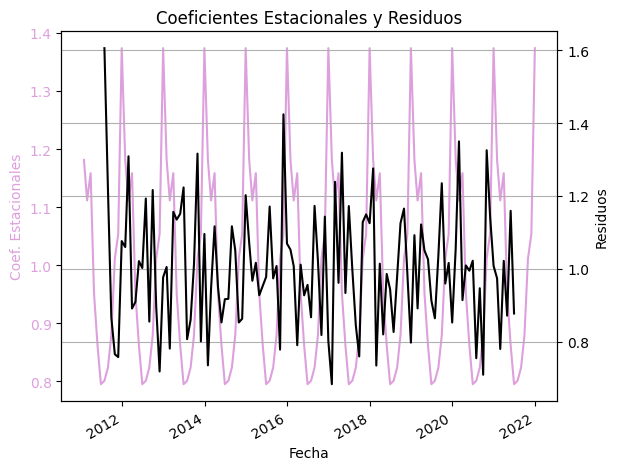

In [20]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Coef. Estacionales', color = '#DDA0DD')
ax1.plot(resultado.seasonal, color = '#DDA0DD')
ax1.tick_params(axis='y', labelcolor = '#DDA0DD')
plt.xticks(rotation=30, ha='right')
ax2 = ax1.twinx() 
ax2.set_ylabel('Residuos', color = '#000000')
ax2.plot(resultado.resid, color = '#000000')
ax2.tick_params(axis='y', labelcolor = '#000000')
plt.title('Coeficientes Estacionales y Residuos')
plt.grid()
plt.show()

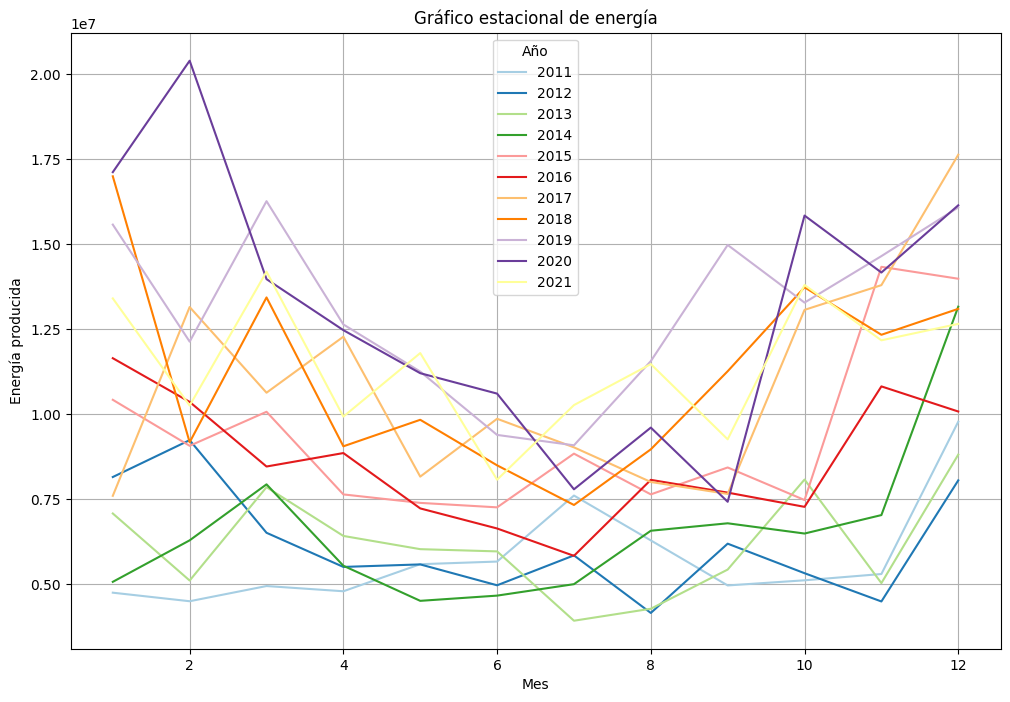

In [21]:
datos['Año'] = pd.to_datetime(datos.index, format='%Y-%m-%d').year
sns.set_palette("Paired", 20)
plt.figure(figsize=(12, 8))
for año, datos_año in datos.groupby('Año'):
    plt.plot(datos_año.index.month, datos_año['Power'], label=str(año))
del datos_año
plt.legend(title='Año')
plt.title('Gráfico estacional de energía')
plt.xlabel('Mes')
plt.ylabel('Energía producida')
plt.grid()
plt.show()

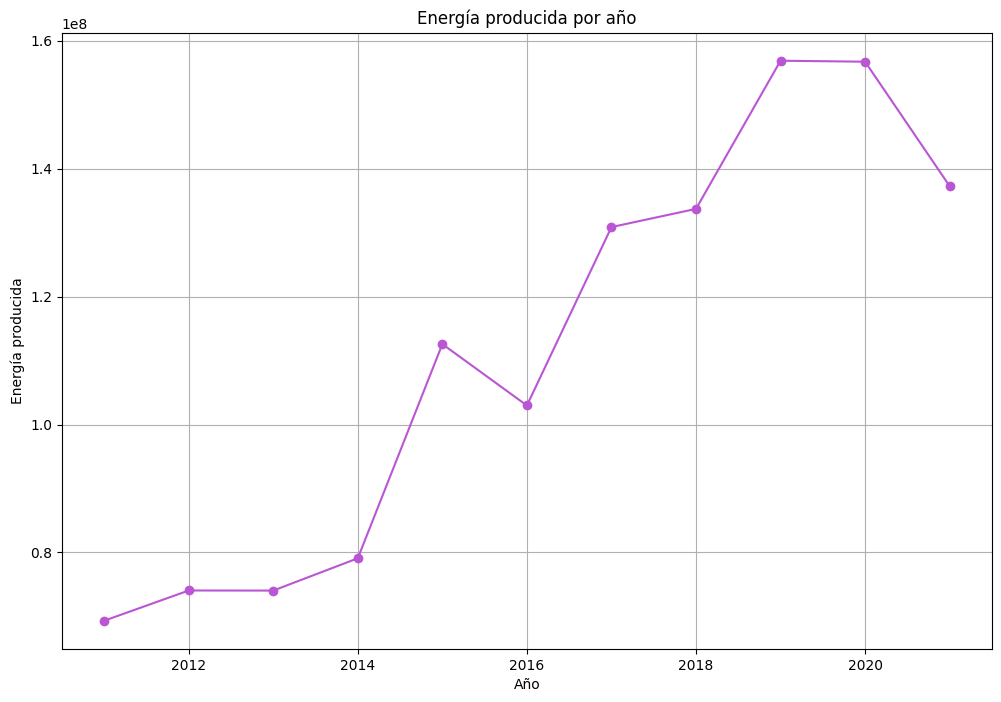

In [24]:
sumatorio_por_año = datos.groupby('Año')['Power'].sum()
datos = datos.drop('Año', axis = 1)
plt.figure(figsize=(12, 8))
plt.plot(sumatorio_por_año.index, sumatorio_por_año, marker='o', color = 'mediumorchid')
plt.title('Energía producida por año')
plt.xlabel('Año')
plt.ylabel('Energía producida')
plt.grid()
plt.show()

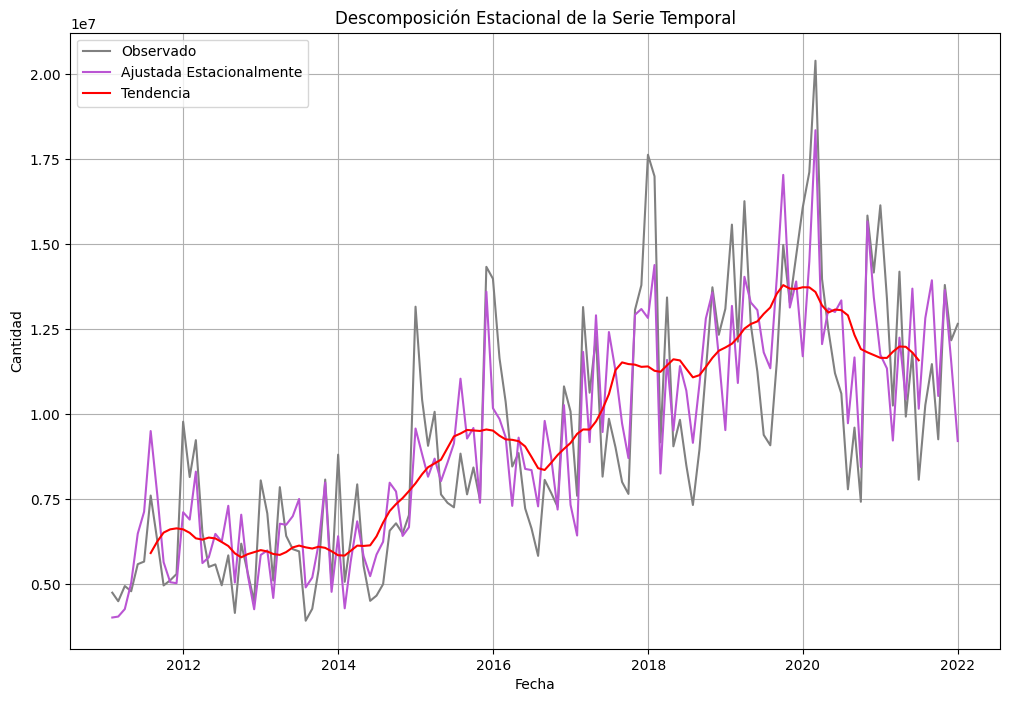

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(resultado.observed, label='Observado', color='grey')
plt.plot(resultado.observed/resultado.seasonal, label='Ajustada Estacionalmente', color='mediumorchid')
plt.plot(resultado.trend, label='Tendencia', color='red')
plt.legend()
plt.grid()
plt.title('Descomposición Estacional de la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.show()

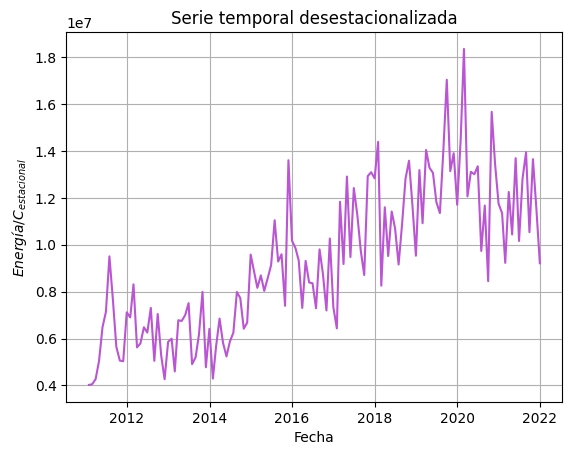

In [23]:
serie_desestacionalizada = np.divide(datos['Power'].tolist(), list(resultado.seasonal))
plt.plot(datos.index, serie_desestacionalizada, color = 'mediumorchid')
plt.grid()
plt.title('Serie temporal desestacionalizada')
plt.xlabel('Fecha')
plt.ylabel(r'$Energía/C_{estacional}$')
plt.show()